In [1]:
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from axessettings import AxesSetting

In [2]:
data = pd.read_csv("./1-2-a-lpf.csv")
data["h"] = data["v2"] / data["v1"]
data["phase"] = (-data["frequency"] * data["t"] * 360 + 180) % 360 - 180
print(data)


    frequency     v1      v2         t         h   phase
0        10.0  250.0  251.00  0.000000  1.004000   0.000
1       100.0  251.5  251.50  0.000000  1.000000   0.000
2       200.0  251.0  250.00  0.000100  0.996016  -7.200
3       500.0  250.5  240.00  0.000098  0.958084 -17.640
4      1000.0  250.0  212.50  0.000088  0.850000 -31.680
5      2000.0  250.0  161.00  0.000069  0.644000 -49.680
6      5000.0  249.0   80.00  0.000039  0.321285 -70.200
7     10000.0  250.0   41.00  0.000022  0.164000 -79.200
8     20000.0  248.5   21.00  0.000012  0.084507 -82.800
9     50000.0  248.5    8.00  0.000005  0.032193 -86.400
10   100000.0  248.0    3.75 -0.000008  0.015121 -79.200
11      600.0  250.0  235.00  0.000096  0.940000 -20.736
12      700.0  250.0  232.00  0.000092  0.928000 -23.184
13      800.0  250.0  225.00  0.000092  0.900000 -26.496
14      900.0  250.0  219.00  0.000090  0.876000 -29.160
15     1100.0  250.0  207.00  0.000086  0.828000 -34.056
16     1200.0  250.0  201.50  0

In [3]:
def h_lpf(s, T):
    return 1 / (1 + s * T)

def h_hpf(s, T):
    return s * T / (1 + s * T)

## Low path filter: |h| and arg h

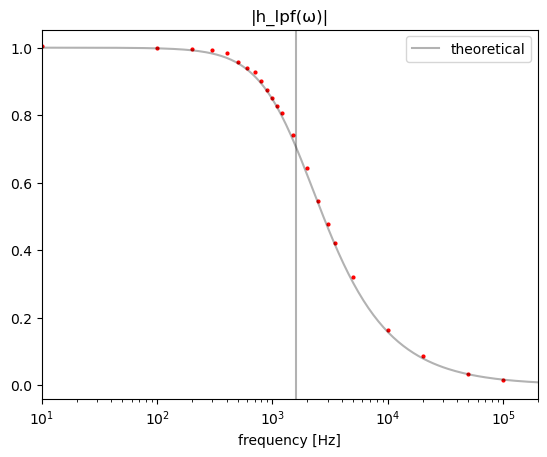

In [4]:
# R = 1kΩ (1e+3), C = 0.1μF (1e-7)

data_extract = data

h_lpf_abs = lambda f, T: abs(h_lpf(2j * np.pi * f, T))

# popt, pcov = curve_fit(h_lpf_abs, data_extract["frequency"], data_extract["h"], bounds=(-np.inf, np.inf))
# print(popt)
# h_lpf_abs_opt = lambda f: h_lpf_abs(f, *popt)

h_lpf_abs_theory = lambda f: h_lpf_abs(f, 1e-4)

fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(title="|h_lpf(ω)|", xlim=(1e1, 2e5), xscale="log", legend=True, xlabel="frequency [Hz]")

# axessetting.plot_func(ax, h_lpf_abs_opt, label="fitted", alpha=0.6, c="lime")
axessetting.plot_func(ax, h_lpf_abs_theory, label="theoretical", alpha=0.3)
ax.axvline(1 / (2 * np.pi * 1e-4), alpha=0.3, c="black")
ax.scatter(data_extract["frequency"], data_extract["h"], s=4, c="red")
axessetting.apply_axes(ax)

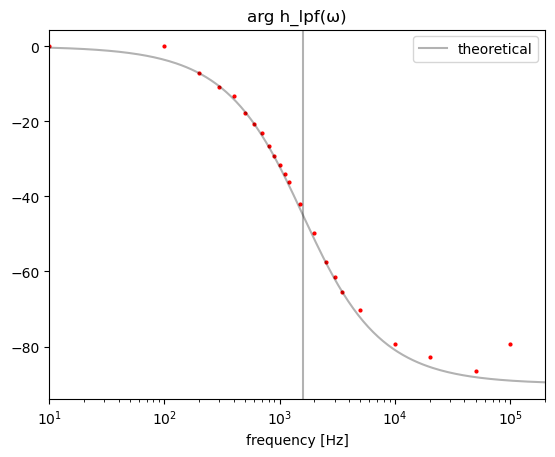

In [5]:
# R = 1kΩ (1e+3), C = 0.1μF (1e-7)

data_extract = data

h_lpf_arg = lambda f, T: np.angle(h_lpf(2j * np.pi * f, T), deg=True)

# popt, pcov = curve_fit(h_lpf_arg, data_extract["frequency"], data_extract["phase"], bounds=(-np.inf, np.inf))
# print(popt)
# h_lpf_arg_opt = lambda f: h_lpf_arg(f, *popt)

h_lpf_arg_theory = lambda f: h_lpf_arg(f, 1e-4)

fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(title="arg h_lpf(ω)", xlim=(1e1, 2e5), xscale="log", legend=True, xlabel="frequency [Hz]")

# axessetting.plot_func(ax, h_lpf_arg_opt, label="fitted", alpha=0.6, c="lime")
axessetting.plot_func(ax, h_lpf_arg_theory, label="theoretical", alpha=0.3)
ax.axvline(1 / (2 * np.pi * 1e-4), alpha=0.3, c="black")
ax.scatter(data_extract["frequency"], data_extract["phase"], s=4, c="red")
axessetting.apply_axes(ax)

## High path filter: |h| and arg h

In [6]:
data = pd.read_csv("./1-2-a-hpf.csv")
data["h"] = data["v2"] / data["v1"]
data["phase"] = (-data["frequency"] * data["t"] * 360 + 180) % 360 - 180
print(data)


    frequency     v1     v2         t         h   phase
0        20.0  258.5    3.2 -0.013000  0.012379  93.600
1        50.0  256.5    8.0 -0.005000  0.031189  90.000
2       100.0  257.0   16.0 -0.002400  0.062257  86.400
3       200.0  257.5   32.0 -0.001160  0.124272  83.520
4       500.0  256.5   77.0  0.001600  0.300195  72.000
5      1000.0  256.0  136.5 -0.000160  0.533203  57.600
6      2000.0  257.0  198.0  0.000444  0.770428  40.320
7      5000.0  256.5  244.0 -0.000011  0.951267  19.800
8     10000.0  255.0  257.5  0.000000  1.009804   0.000
9    100000.0  251.5  252.0  0.000000  1.001988   0.000
10   200000.0  256.5  255.5  0.000000  0.996101   0.000
11     6000.0  256.0  247.5 -0.000007  0.966797  15.552
12      700.0  257.5  103.5 -0.000264  0.401942  66.528
13     4000.0  256.5  239.0  0.000234  0.931774  23.040
14     3000.0  256.0  225.5 -0.000026  0.880859  28.080
15      300.0  257.5   47.0 -0.000740  0.182524  79.920
16      400.0  257.0   63.5 -0.000540  0.247082 

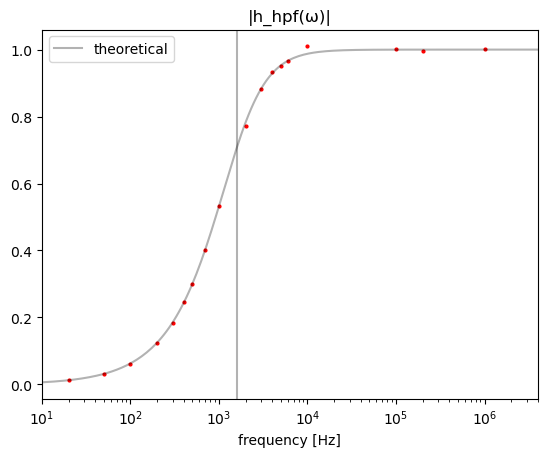

In [7]:
# R = 1kΩ (1e+3), C = 0.1μF (1e-7)

data_extract = data

h_hpf_abs = lambda f, T: abs(h_hpf(2j * np.pi * f, T))

# popt, pcov = curve_fit(h_hpf_abs, data_extract["frequency"], data_extract["h"], bounds=(-np.inf, np.inf))
# print(popt)
# h_hpf_abs_opt = lambda f: h_hpf_abs(f, *popt)

h_hpf_abs_theory = lambda f: h_hpf_abs(f, 1e-4)

fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(title="|h_hpf(ω)|", xlim=(1e1, 4e+6), xscale="log", legend=True, xlabel="frequency [Hz]")

# axessetting.plot_func(ax, h_hpf_abs_opt, label="fitted", alpha=0.6, c="lime")
axessetting.plot_func(ax, h_hpf_abs_theory, label="theoretical", alpha=0.3)
ax.axvline(1 / (2 * np.pi * 1e-4), alpha=0.3, c="black")
ax.scatter(data_extract["frequency"], data_extract["h"], s=4, c="red")
axessetting.apply_axes(ax)

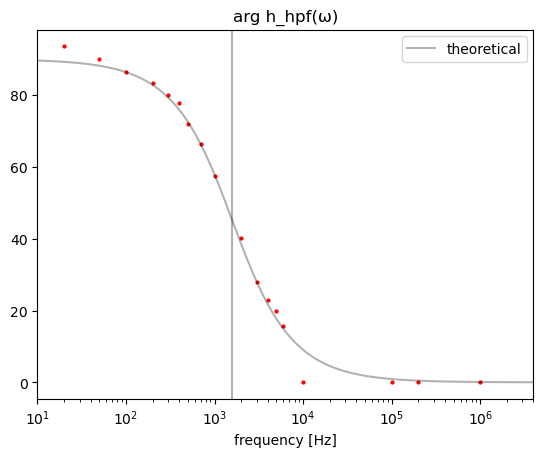

In [8]:
# R = 1kΩ (1e+3), C = 0.1μF (1e-7)

data_extract = data

h_hpf_arg = lambda f, T: np.angle(h_hpf(2j * np.pi * f, T), deg=True)

# popt, pcov = curve_fit(h_hpf_arg, data_extract["frequency"], data_extract["phase"], bounds=(-np.inf, np.inf))
# print(popt)
# h_hpf_arg_opt = lambda f: h_hpf_arg(f, *popt)

h_hpf_arg_theory = lambda f: h_hpf_arg(f, 1e-4)

fig = plt.figure()
ax = fig.add_subplot(111)

axessetting = AxesSetting(title="arg h_hpf(ω)", xlim=(1e1, 4e+6), xscale="log", legend=True, xlabel="frequency [Hz]")

# axessetting.plot_func(ax, h_hpf_arg_opt, label="fitted", alpha=0.6, c="lime")
axessetting.plot_func(ax, h_hpf_arg_theory, label="theoretical", alpha=0.3)
ax.axvline(1 / (2 * np.pi * 1e-4), alpha=0.3, c="black")
ax.scatter(data_extract["frequency"], data_extract["phase"], s=4, c="red")
axessetting.apply_axes(ax)

# (b) Step wave & fitting

V1 =  0.54V
slope:  6.0e+03
T (using slope) =  9.05e-05s
T (fitted) =  1.05e-04


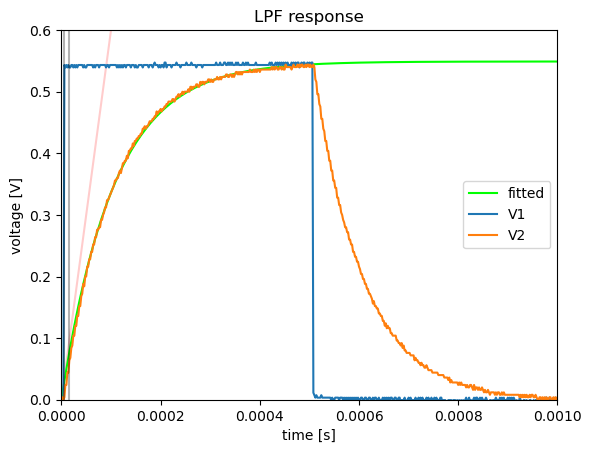

In [9]:
# 遅延
delay = 0.06e-4
t_slope = (0.06e-4, 0.16e-4)

df_lpf = pd.read_csv("lpf1.csv", skiprows=[1])
df_lpf["X"] += delay
df_lpf["CH1"] -= np.mean(df_lpf[df_lpf["CH1"] < 0]["CH1"])
df_lpf["CH2"] -= df_lpf["CH2"].min()
v1_lpf = np.mean(df_lpf[df_lpf["CH1"] > 0.08]["CH1"])
print(f"V1 = {v1_lpf: .2f}V")

#傾きによるTの導出
# 傾きを求める
df_use = df_lpf[(df_lpf["X"] >= t_slope[0]) & (df_lpf["X"] < t_slope[1])]
slope = np.mean([(df_use.iloc[i+1]["CH2"] - df_use.iloc[i]["CH2"])/(df_use.iloc[i+1]["X"] - df_use.iloc[i]["X"]) for i in range(len(df_use) - 1)])
print(f"slope: {slope: .1e}")
print(f"T (using slope) = {v1_lpf / slope: .2e}s")
line_similar = lambda t: t * slope

# フィッティングによるTの導出
df_fit = df_lpf[(df_lpf["X"] < 4.9e-4) & (df_lpf["X"] > 0.06e-4)]
fit_lpf = lambda t, T, V: V * (-np.exp(-t / T) + 1)
popt, pvar = curve_fit(fit_lpf, df_fit["X"], df_fit["CH2"])
print(f"T (fitted) = {popt[0]: .2e}")


fig = plt.figure()
ax = fig.add_subplot(111)
axessetting = AxesSetting(title=f"LPF response", legend=True, xlabel="time [s]", xlim=(0, 1e-3), ylabel="voltage [V]", ylim=(0, 0.6))

axessetting.plot_func(ax, line_similar, c="red")
axessetting.plot_func(ax, lambda x: fit_lpf(x, *popt), label="fitted", c="lime", alpha=1)
ax.plot(df_lpf["X"], df_lpf["CH1"], label="V1")
ax.plot(df_lpf["X"], df_lpf["CH2"], label="V2")
ax.axvline(t_slope[0], alpha=0.3, c="black")
ax.axvline(t_slope[1], alpha=0.3, c="black")

axessetting.apply_axes(ax)

V1 =  0.55V
slope: -6.7e+03
T (using slope) =  8.31e-05s
T (fitted) =  1.03e-04


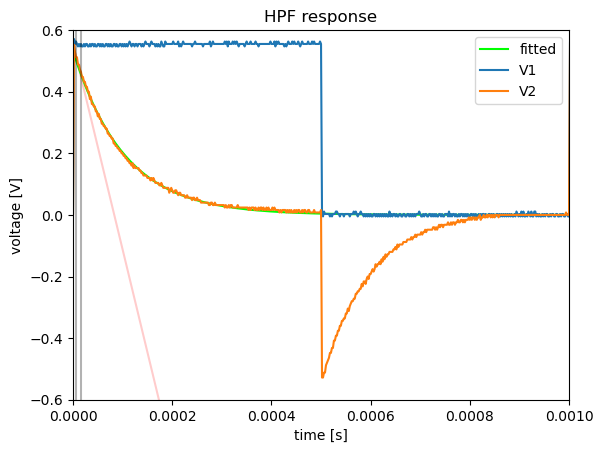

In [10]:
# 遅延
delay = 0e-4
t_slope = (0.06e-4, 0.16e-4)

df_hpf = pd.read_csv("hpf1.csv", skiprows=[1])
df_hpf["X"] += delay
df_hpf["CH1"] -= np.mean(df_hpf[df_hpf["CH1"] < 0]["CH1"])
v1_hpf = np.mean(df_hpf[df_hpf["CH1"] > 0.08]["CH1"])
print(f"V1 = {v1_hpf: .2f}V")

# 傾きを求める
df_use = df_hpf[(df_hpf["X"] >= t_slope[0]) & (df_hpf["X"] < t_slope[1])]
slope = np.mean([(df_use.iloc[i+1]["CH2"] - df_use.iloc[i]["CH2"])/(df_use.iloc[i+1]["X"] - df_use.iloc[i]["X"]) for i in range(len(df_use) - 1)])
print(f"slope: {slope: .1e}")
print(f"T (using slope) = {-v1_hpf / slope: .2e}s")
line_similar = lambda t: t * slope + v1_hpf

# フィッティングによるTの導出
df_fit = df_hpf[(df_hpf["X"] < 4.9e-4) & (df_hpf["X"] > 0.1e-4)]
fit_hpf = lambda t, T, V: V * np.exp(-t / T)
popt, pvar = curve_fit(fit_hpf, df_fit["X"], df_fit["CH2"], bounds=([0, 0], [2e-4, np.inf]))
print(f"T (fitted) = {popt[0]: .2e}")

fig = plt.figure()
ax = fig.add_subplot(111)
axessetting = AxesSetting(title=f"HPF response", legend=True, xlabel="time [s]", xlim=(0, 1e-3), ylabel="voltage [V]", ylim=(-0.6, 0.6))

axessetting.plot_func(ax, line_similar, c="red")
axessetting.plot_func(ax, lambda x: fit_hpf(x, *popt), label="fitted", c="lime", alpha=1)
ax.plot(df_hpf["X"], df_hpf["CH1"], label="V1")
ax.plot(df_hpf["X"], df_hpf["CH2"], label="V2")
ax.axvline(t_slope[0], alpha=0.3, c="black")
ax.axvline(t_slope[1], alpha=0.3, c="black")

axessetting.apply_axes(ax)